# Assignment 6

In [157]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1 

Implement the Metropolis-Hastings (M-H) algorithm to simulate gamma distribution 𝐺𝑎(𝛼, 𝛽), using exponential distribution 𝐸𝑥𝑝(𝜆) as the proposal distribution. Simulate 𝐺𝑎(3,1). Use the independence chains version of M-H. (Note: 𝛼 in gamma distribution and 𝛼 denoting the acceptance probability are two different things; standard notation: no reason for my head to roll for this .) 

### Definition of The Metropolis-Hastings algorithm


When one cannot simulate full conditionals, i.e. the prior, one can propose an initial distribution. If **$\boldsymbol{\pi}(\theta)$** is the density of interest and **$\boldsymbol{q}(\theta, \phi)$** is the proposal distribution, we can construct the following algorithm:


1. Initialise the counter to 𝑗 = 1 and the state to $\theta^{(0)}$ = $(\theta_{1}^{(0)}, ..., \theta_{d}^{(0)})^{T}$. 


2. Generate a proposal value $\phi$ using the kernel $q(\theta^{j-1}, \phi)$

3. Evaluate the acceptance probability $\alpha(\theta^{j-1}, \phi)$ of the proposed move, where 
$\alpha(\theta^{j-1}, \phi)$ = $\min\left\{ 1, \, \frac{\pi(\phi) \, q(\phi, \theta)}{\pi(\theta)q(\theta, \phi) } \right\}$

4. Put $\theta^{j} = \phi$ with probability$\alpha(\theta^{j-1}, \phi)$, else put  $\theta^{j} = \theta^{j-1}$.

5. Change 𝑗 to 𝑗 + 1 and return to step 2.



In [158]:
N_iterations = 10**5 # number of samples/iterations
a = 3
b = 1

In [159]:
# Target distribution
def gamma_pdf(x, a=3, b=1):
    return (b**a / np.math.gamma(a)) * x**(a-1) * np.exp(-b*x)

# Proposal distribution
def exp_pdf(x, lam):
    return lam * np.exp(-lam * x)

def metropolis_hastings(lambda_i, N_iterations, a, b): 
    
    
    samples = np.zeros(N_iterations)
    x = np.random.exponential(1/lambda_i)
    accepted = 0
    for i in range(N_iterations):
        y = np.random.exponential(1/lambda_i)
        
        # compute acceptance ratio
        acceptance_prob = (gamma_pdf(y, a, b)*exp_pdf(x, lambda_i))/(gamma_pdf(x,a,b)*exp_pdf(y,lambda_i))
        
        alpha = min(1.0, acceptance_prob)
        
        if np.random.rand() < alpha:
            x = y
            accepted += 1
        samples[i] = x
        
    return samples, accepted/N_iterations

a) (w=3) Find the optimal proposal distribution, in this case, find the value for 𝜆 that maximises the acceptance probability. Determine this value with precision ± 0.05. To do this, compute acceptance probabilities 𝛼 for various 𝜆 values within an appropriate interval. For instance, choose initially $\lambda_i$ ∈ [0.1, 1] with a suitable step of 0.1, perform $10^5$ samples/iterations (𝑖 = 1, 2, … , $10^5$) of Metropolis-Hastings acceptance evaluations to determine $\lambda$ = $\lambda_{opt}$. Then narrow down the interval and step for $\lambda_i$ until you can determine the value $\lambda = \lambda_{opt}$ with precision 0.05, that is, $\lambda$ = $\lambda_{opt}^{correct} \pm 0.05$. Do this even if you should be able to figure out the exact value for the optimum $\lambda$ = $\lambda_{opt}$. In your solution, show a plot for an appropriate interval of 𝝀 proving that you are picking the correct value $\lambda$ = $\lambda_{opt}$ (𝜆 on the horizontal axis, 𝛼 on the vertical axis) and that you can pick it with the given precision ±0.05. Of course, print out the value of $\lambda_{opt}$.


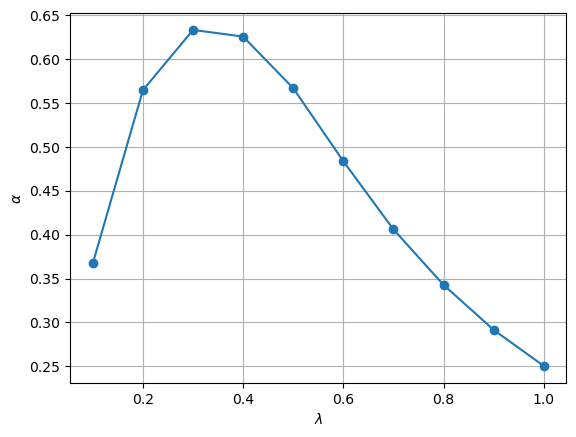

In [160]:
lambdas = np.arange(0.1, 1.1, 0.1)
accept_rates = [metropolis_hastings(lambda_i, N_iterations, a, b)[1] for lambda_i in lambdas]

plt.plot(lambdas, accept_rates, marker='o')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\alpha$')
plt.grid(True)
plt.show()


In [161]:
lambda_opt1 = lambdas[np.argmax(accept_rates)]
print(r'$\lambda_{opt}', f'first: {lambda_opt1:.2f}')

$\lambda_{opt} first: 0.30


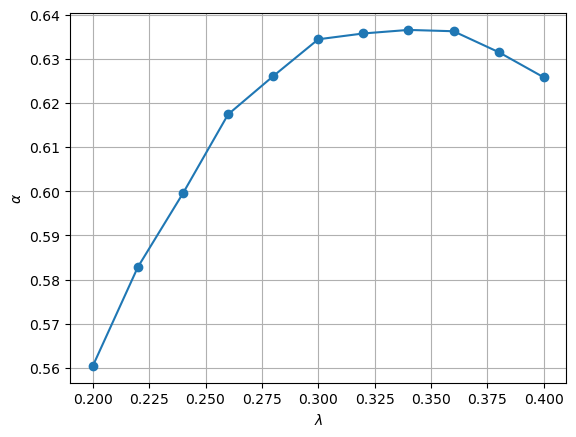

$\lambda_{opt} second: 0.34


In [162]:
lambdas = np.arange(0.2, 0.42, 0.02)
accept_rates = [metropolis_hastings(lambda_i, N_iterations, a, b)[1] for lambda_i in lambdas]

plt.plot(lambdas, accept_rates, marker='o')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\alpha$')
plt.grid(True)
plt.show()

lambda_opt1 = lambdas[np.argmax(accept_rates)]
print(r'$\lambda_{opt}', f'second: {lambda_opt1:.2f}')


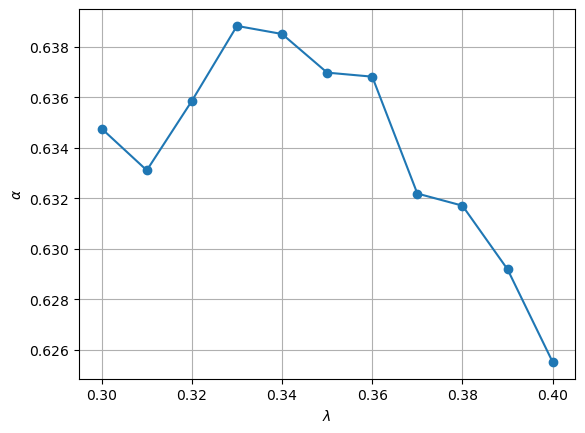

$\lambda_{opt} third: 0.33


In [163]:
lambdas = np.arange(0.3, 0.41, 0.01)
accept_rates = [metropolis_hastings(lambda_i, N_iterations, a, b)[1] for lambda_i in lambdas]

plt.plot(lambdas, accept_rates, marker='o')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\alpha$')
plt.grid(True)
plt.show()

lambda_opt1 = lambdas[np.argmax(accept_rates)]
print(r'$\lambda_{opt}', f'third: {lambda_opt1:.2f}')


#### Answer:

In [164]:
print(r'Ans: $\lambda_{opt}\pm0.05 is ', round(lambda_opt1,2))

Ans: $\lambda_{opt}\pm0.05 is  0.33


b) (w=2) Use the optimal proposal distribution to simulate 𝑮𝒂(𝟑, 𝟏). Simulate for $10^6$,
samples. Plot the resulting distribution ($10^6$, points in a histogram, use a sufficient number
of bins) with the corresponding functional form of the gamma distribution (line plot for
this- not a histogram; for example plt.plot(np.arange..., Gamma(np.arange...)).


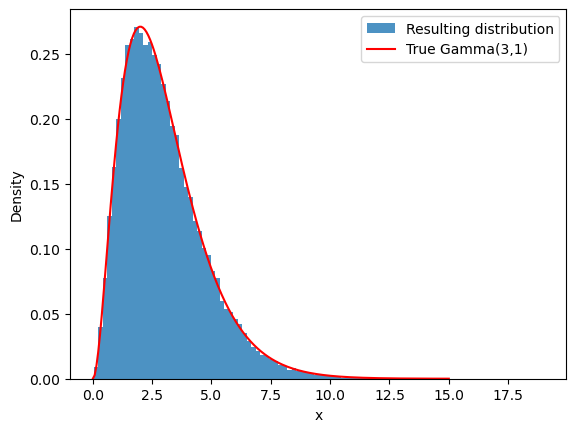

In [165]:
samples = metropolis_hastings(lambda_opt, N_iterations, a, b)[0]
xvals = np.linspace(0, 15, 200)
plt.hist(samples, bins=100, density=True, label='Resulting distribution', alpha = 0.8)
plt.plot(xvals, gamma_pdf(x, a=3, b=1), 'r-', label="True Gamma(3,1)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

c) (w=1) Compute and print the numerical values for mean and variance for the resulting
distribution.


In [166]:
mean = np.mean(samples)
var = np.var(samples)
print(f'Mean of the distribution is {mean:0.2f}')
print(f'Variance of the distribution is {var:0.2f}')

Mean of the distribution is 2.99
Variance of the distribution is 2.98


d) (w=1) Which of the two methods, the Gibbs sampler or Metropolis-Hastings, requires
less information and so is more generally applicable? State briefly the reason for this (one
sentence will suffice).


**Answer:** 

Metropolis-hastings requires less information. 

Gibbs sampler requires full conditionals, while Metropolis–Hastings only needs the target density up to a proportionality constant (i.e. does not need full conditional), so Metropolis–hastings is more generally applicable.

Note: The definitions used here for 𝐺𝑎(𝛼, 𝛽) and 𝐸𝑥𝑝(𝜆) are the ones given in the lecture
notes. If you use some other definition, make sure you calculate the corresponding values
in that parametrisation. (In order to have the same numbers to check for in peergrade.)
Note also: Distibutions here are densities – not CDFs. This is how the word is typically used,
although the “official” definition means cumulative functions, see Lecture 1.